# The Sparks Foundation

## Data Science & Business Analytics Internship

## Author - Rahul Garg

### In this simple linear regression task, we will predict the percentage of a student based on the number of study hours.

In [1]:
# importing al the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Reading data from remote link
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#shape
s_data.shape

(25, 2)

In [4]:
s_data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#correlation
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Let's visualize the data graphically to find out any relationship between the given data

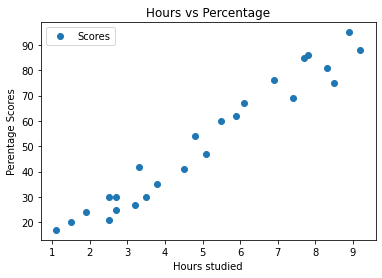

In [24]:
#Plotting distribution of scores
s_data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Perentage Scores")
plt.show()

## Preparing the data

### In this step, we will divide the data into attributes and labels

In [12]:
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

#### Now, the next step is to split the data into training set and test set.This can be done with the help of scikit_learn's train_test_split() method.

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Training the algorithm

### After splitting the data into training and test sets, let's train our algorithm

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete")

Training complete


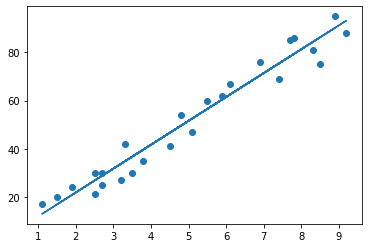

In [17]:
#Plotting the regression line
line=regressor.coef_*x+regressor.intercept_

#Plotting test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

Making Predictions


Now, our algorithm has been trained, it's time to make some predictions.

In [20]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#Comparing Actual Vs Predicted data
dtf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(dtf)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [22]:
#testing with sample data 
hours=[9.25]
own_pred=regressor.predict([hours])
print("No. of hours= {}".format(hours))
print("Predicted Score= {}".format(own_pred[0]))

No. of hours= [9.25]
Predicted Score= 93.69173248737535


## Evaluating the model

#### The final step is to evaluate the model. This step is done to evaluate and analyze the performance of an algorithm on a particular dataset. For evaluation purpose, we have chosen the mean square error metrics.

In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("r2_score Error:",r2_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
r2_score Error: 0.9454906892105355
Mean Squared Error: 21.598769307217406
